In [2]:
import jieba

In [1]:
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('./data/stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

# 对句子进行中文分词
def seg_depart(sentence):
     # 对文档中的每一行进行中文分词
    # print("正在分词")
    sentence_depart = jieba.cut(sentence.strip())
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                 outstr += word
                 outstr += " "
    return outstr

 # 给出文档路径
filename = "./data/cnews.train_preprocess.txt"
outfilename = "./data/cnews.train_jieba.txt"
inputs = open(filename, 'r', encoding='UTF-8')
outputs = open(outfilename, 'w', encoding='UTF-8')

# 将输出结果写入ou.txt中
for line in inputs:
    line_seg = seg_depart(line)
    outputs.write(line_seg + '\n')
    
outputs.close()
inputs.close()
print("删除停用词和分词成功！！！")

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.053 seconds.
Prefix dict has been built succesfully.


删除停用词和分词成功！！！


In [2]:
from gensim import corpora, models, similarities
fr = open('./data/cnews.train_jieba.txt', 'r',encoding='utf-8')
train = []
for line in fr.readlines():
    line = line.split(' ')
    train.append(line)
# 接下来就是模型构建的步骤了，首先构建词频矩阵
dictionary = corpora.Dictionary(train)
corpus = [dictionary.doc2bow(text) for text in train]
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=6)
topic_list = lda.print_topics(6)
for topic in topic_list:
    print(topic)

(0, '0.205*"" + 0.008*"基金" + 0.006*"型基金" + 0.005*"像素" + 0.004*"净值" + 0.004*"佳能" + 0.003*"中" + 0.003*"公司" + 0.002*"投资" + 0.002*"证券"')
(1, '0.268*"" + 0.009*"对焦" + 0.005*"online" + 0.003*"中" + 0.003*"九州" + 0.003*"灵兽" + 0.002*"\n" + 0.002*"尼康" + 0.002*"学生" + 0.002*"EOS"')
(2, '0.388*"" + 0.003*"\n" + 0.003*"中" + 0.002*"游戏" + 0.002*"说" + 0.002*"学生" + 0.002*"移民" + 0.002*"做" + 0.002*"考试" + 0.001*"拍摄"')
(3, '0.435*"" + 0.005*"玩家" + 0.004*"中" + 0.003*"基金" + 0.003*"中国" + 0.003*"\n" + 0.002*"游戏" + 0.002*"说" + 0.002*"学生" + 0.002*"机身"')
(4, '0.406*"" + 0.003*"中" + 0.003*"游戏" + 0.003*"功能" + 0.003*"\n" + 0.003*"元" + 0.002*"英寸" + 0.002*"活动" + 0.002*"说" + 0.002*"相机"')
(5, '0.389*"" + 0.024*"基金" + 0.006*"市场" + 0.005*"投资" + 0.005*"公司" + 0.004*"中" + 0.003*"中国" + 0.003*"元" + 0.003*"产品" + 0.002*"新"')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.

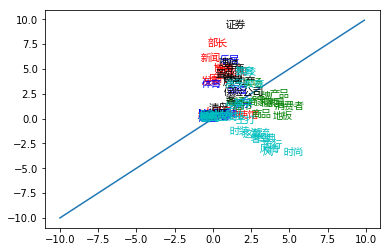

<Figure size 432x288 with 0 Axes>

In [5]:
# coding=utf-8
import gensim
from gensim.models import word2vec
cut_file='./data/cnews.train_jieba.txt'
save_model_name = './data/train_word2vec.model.bin'
sentences =word2vec.Text8Corpus(cut_file)  # 加载语料
model =gensim.models.Word2Vec(sentences, size=200)  # 训练skip-gram模型; 默认window=5
model.save(save_model_name)
from gensim.models import word2vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

mopdelfilePath = './data/train_word2vec.model.bin'
model = word2vec.Word2Vec.load(mopdelfilePath)
raw_word_vec = model.wv.vectors

cent_word1 = "新闻"
cent_word2 = "娱乐"
cent_word3 = "家具"
cent_word4 = "房产"
cent_word5 = "教育"
cent_word6 = "时尚"


wordList1 = model.most_similar(cent_word1)
wordList2 = model.most_similar(cent_word2)
wordList3 = model.most_similar(cent_word3)
wordList4 = model.most_similar(cent_word4)
wordList5 = model.most_similar(cent_word5)
wordList6 = model.most_similar(cent_word6)


wordList1 = np.append([item[0] for item in wordList1], cent_word1)
wordList2 = np.append([item[0] for item in wordList2], cent_word2)
wordList3 = np.append([item[0] for item in wordList3], cent_word3)
wordList4 = np.append([item[0] for item in wordList4], cent_word4)
wordList5 = np.append([item[0] for item in wordList5], cent_word5)
wordList6 = np.append([item[0] for item in wordList6], cent_word6)


def get_word_index(word):
    index = model.wv.vocab[word].index
    return index

index_list1 = map(get_word_index, wordList1)
index_list2 = map(get_word_index, wordList2)
index_list3 = map(get_word_index, wordList3)
index_list4 = map(get_word_index, wordList4)
index_list5 = map(get_word_index, wordList5)
index_list6 = map(get_word_index, wordList6)


vec_reduced = PCA(n_components=2).fit_transform(raw_word_vec)
zhfont = matplotlib.font_manager.FontProperties(fname='./data/msyh.ttf')
x = np.arange(-10, 10, 0.1)
y = x
plt.plot(x, y)

for i in index_list1:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='r', fontproperties=zhfont)

for i in index_list2:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='b', fontproperties=zhfont)

for i in index_list3:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='g', fontproperties=zhfont)

for i in index_list4:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='k', fontproperties=zhfont)

for i in index_list5:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)
for i in index_list6:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)

plt.show()
plt.savefig("./img/title.png")
